In [42]:
import numpy as np
import time
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from gp import *

cs = [[x/256 for x in (8, 65, 92)], \
    [x/256 for x in (204, 41, 54)], \
    [x/256 for x in (118, 148, 159)], \
    [x/256 for x in (232, 197, 71)], \
    [x/256 for x in (135,62,35)]] 

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [43]:
step = 0.1
x_query = np.arange(-10, 10+step, step).reshape(-1,1)

theta0 = [1,1,1] # Kernel variables
n_sample_function = 5

model_prior = GPR(None, None, covariance_function=KernelFunction, theta=theta0)
mean_prior, cov_prior = model_prior.predict(x_query, cov=True)
std_prior = np.diag(cov_prior)

y_samples_prior = model_prior.draw_function_sample(x_query, n_sample_function)
#y_query = np.random.multivariate_normal(mean=mean_prior.ravel(), cov=covar_prior, size=n_sample_function)



Size of feature training data = (0, 1)
Size of output training data = (0, 1)


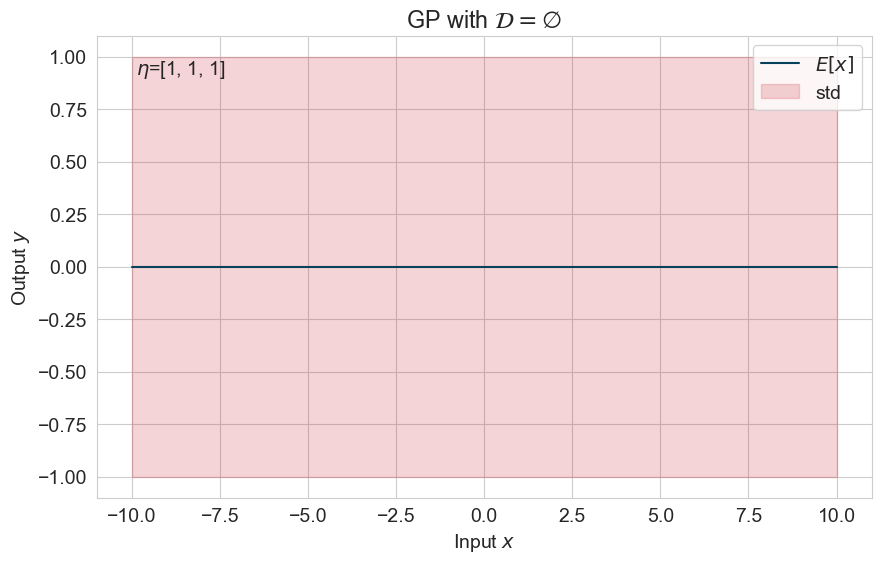

In [44]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_prior, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_prior.reshape(-1) - std_prior, mean_prior.reshape(-1) + std_prior,
                    color=cs[1], alpha=0.2, label='std')

plt.annotate(r'$\eta$=' + str(model_prior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.05, .95), textcoords='axes fraction',
            va='top', ha='left')
plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'GP with $\mathcal{D} = \varnothing$')
plt.legend()
plt.savefig('img/GP_nodata.pdf', format='pdf')


In [45]:
x_train = np.arange(-5,6,1).reshape(-1,1)
x_train = np.array([-4, -2, 0, 3, 5]).reshape(-1,1)
#x_train = np.random.uniform(-6,6,5).reshape(-1,1)
y_train = x_train**2


model_posterior = GPR(x_train, y_train, covariance_function=KernelFunction, theta=theta0)
# Before ML optimization
mean_b, cov_b = model_posterior.predict(x_query, cov=True)
std_b = np.diag(cov_b)
y_samples_b = model_posterior.draw_function_sample(x_query, n_sample_function)




Size of feature training data = (5, 1)
Size of output training data = (5, 1)


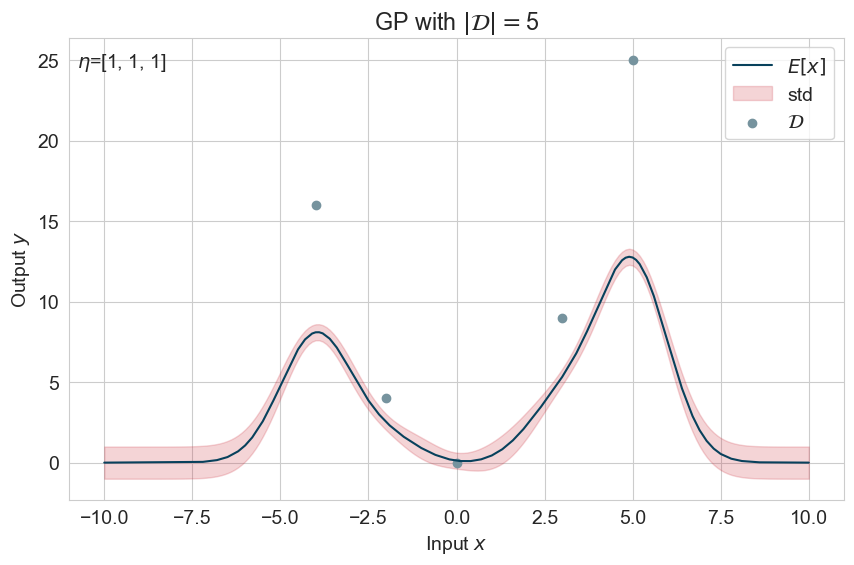

In [46]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_b, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_b.reshape(-1) - std_b, mean_b.reshape(-1) + std_b,
                    color=cs[1], alpha=0.2, label='std')

plt.scatter(x_train, y_train, color=cs[2], label=r'$\mathcal{D}$')


plt.annotate(r'$\eta$=' + str(model_posterior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.01, .97), textcoords='axes fraction',
            va='top', ha='left')

plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')

plt.title(r'GP with $\vert \mathcal{D} \vert = $' + str(len(x_train[:,0])))
plt.legend()
plt.savefig('img/GP_data_no_ML.pdf', format='pdf')

In [47]:
x_train = np.random.uniform(-6,6,50).reshape(-1,1)
y_train = x_train**2


model_posterior = GPR(x_train, y_train, covariance_function=KernelFunction, theta=theta0)
# Before ML optimization
mean_b, cov_b = model_posterior.predict(x_query, cov=True)
std_b = np.diag(cov_b)
y_samples_b = model_posterior.draw_function_sample(x_query, n_sample_function)


Size of feature training data = (50, 1)
Size of output training data = (50, 1)


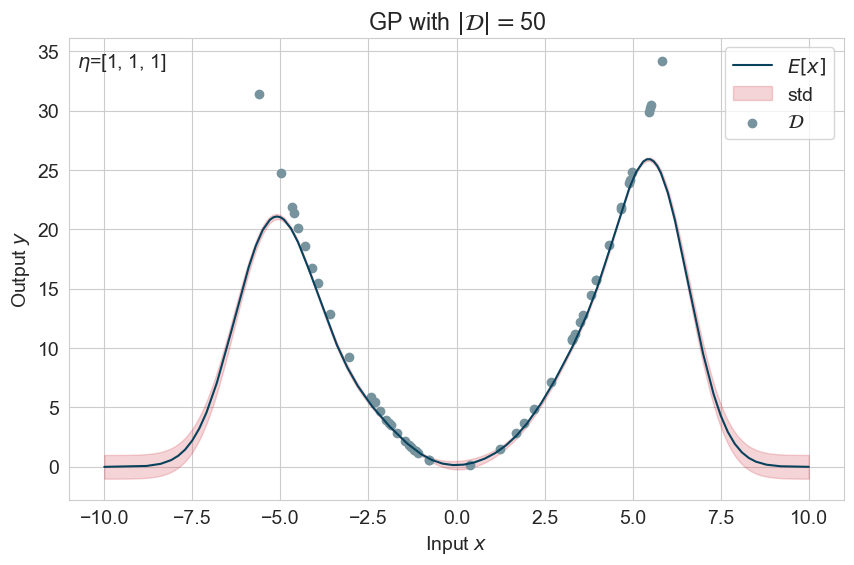

In [48]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_b, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_b.reshape(-1) - std_b, mean_b.reshape(-1) + std_b,
                    color=cs[1], alpha=0.2, label='std')

plt.scatter(x_train, y_train, color=cs[2], label=r'$\mathcal{D}$')


plt.annotate(r'$\eta$=' + str(model_posterior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.01, .97), textcoords='axes fraction',
            va='top', ha='left')

plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')

plt.title(r'GP with $\vert \mathcal{D} \vert = $' + str(len(x_train[:,0])))
plt.legend()
plt.savefig('img/GP_data_lots.pdf', format='pdf')

In [49]:
x_train = np.array([-4, -2, 0, 3, 5]).reshape(-1,1)
y_train = x_train**2


model_posterior = GPR(x_train, y_train, covariance_function=KernelFunction, theta=theta0)

# ML optimization
model_posterior.fit()

# After optimization
mean_a, cov_a = model_posterior.predict(x_query, cov=True)
std_a = np.diag(cov_a)
y_samples_a = model_posterior.draw_function_sample(x_query, n_sample_function)

Size of feature training data = (5, 1)
Size of output training data = (5, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (5, 1)
Size of output training data = (5, 1)
Optimization done
Hyperparameters after optimization = [15.29 172.43 0.03]


/home/ja/Projects/Gaussian-process/gp.py:130: RuntimeWarning: covariance is not positive-semidefinite.
  y_sample = np.random.multivariate_normal(mean=mean_at_values.ravel(), cov=cov_matrix, size=n_sample_functions)


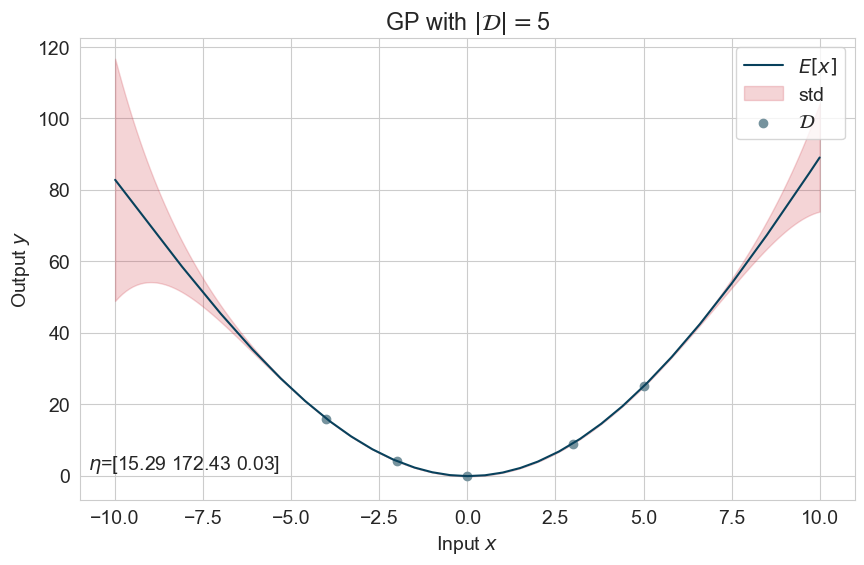

In [50]:
font = {'family' : 'normal',
'size'   : 14}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rc('font', **font)

plt.style.use('fast')
sns.set_style("whitegrid")

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x_query, mean_a, color=cs[0], label=r'$E[x]$')
plt.fill_between(x_query.reshape(-1), mean_a.reshape(-1) - std_a, mean_a.reshape(-1) + std_a,
                    color=cs[1], alpha=0.2, label='std')


plt.scatter(x_train, y_train, color=cs[2], label=r'$\mathcal{D}$')



plt.annotate(r'$\eta$=' + str(model_posterior.theta), xy=(2, 1), xycoords='data',
            xytext=(0.01, .1), textcoords='axes fraction',
            va='top', ha='left')


plt.xlabel(r'Input $x$')
plt.ylabel(r'Output $y$')
plt.title(r'GP with $\vert \mathcal{D} \vert = $' + str(len(x_train[:,0])))
plt.legend()
plt.savefig('img/GP_data_with_ML.pdf', format='pdf')

Text(0.5, 1.0, 'Prior distribution')

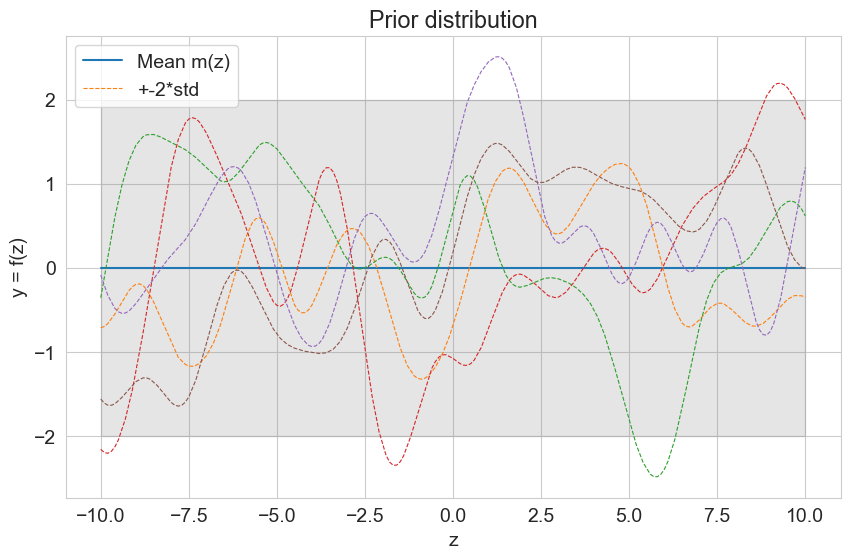

In [54]:
plt.figure(figsize=(10,6), dpi=100)

plt.plot(x_query, mean_prior)
plt.fill_between(x_query.reshape(-1), mean_prior.reshape(-1) - 2*std_prior, mean_prior.reshape(-1) + 2*std_prior, color='gray', alpha=0.2, label=r'$\pm2 \cdot$ std')

for i in range(y_samples_prior.shape[0]):
    plt.plot(x_query, y_samples_prior[i], '--', linewidth=0.8)

plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std'))
plt.title('Prior distribution')



